<a href="https://colab.research.google.com/github/vermanaman419-prog/flight_ticket_optimizer/blob/main/flight_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline** **Ticket** **Price** **Optimizer** - **A** **complete** **Data** **Science** **Project**

# **Step 1 -  Importing all the Required Libraries**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Step** **2** - **Loading** **The** **Data**  + **EDA**

In [58]:
df=pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Droping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

In [4]:
# A Quick Information abou the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
# Stastical Description of Data
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
# Size of the data
df.shape

(300153, 11)

In [8]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

,count
airline,
Indigo,704
Air_India,218
GO_FIRST,205
SpiceJet,186
Vistara,133
AirAsia,115


# **Step 3 - Visualizations**

/tmp/ipython-input-1404714731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df1['airline'],palette='hls')


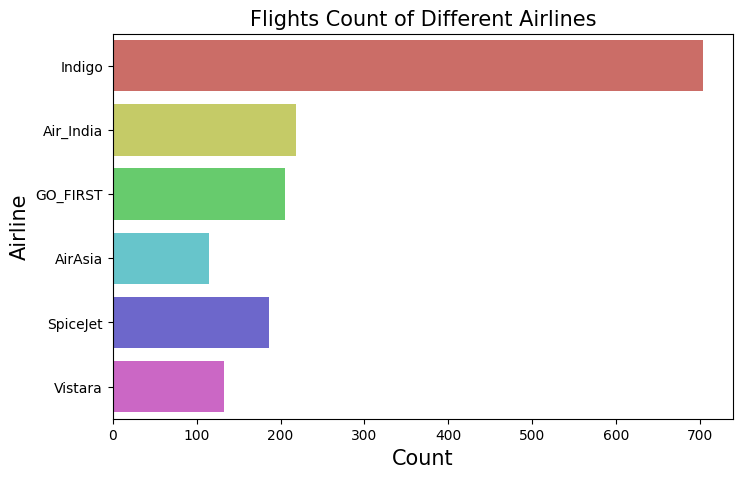

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Airline',fontsize=15)
plt.show()

In [13]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

,count
class,
Economy,1560
Business,295


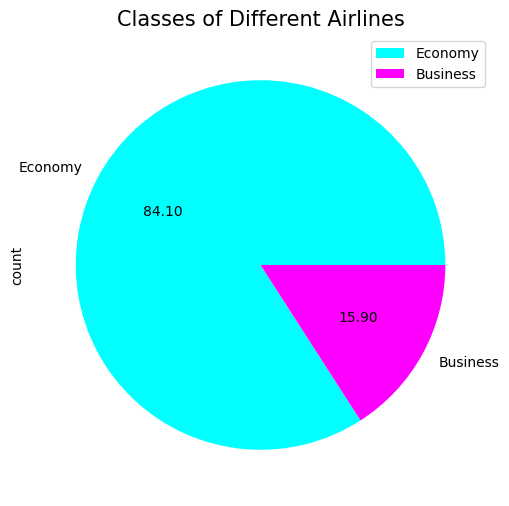

In [16]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

Does price vary with Airlines?




/tmp/ipython-input-3842161845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['airline'],y=df['price'],palette='hls')


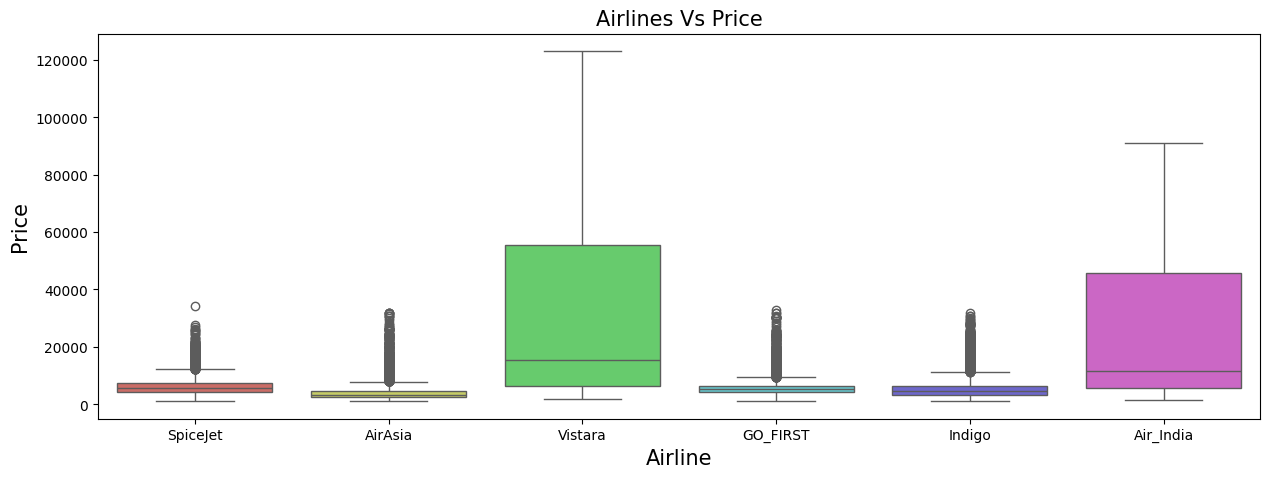

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

/tmp/ipython-input-1169503579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class',y='price',data=df,palette='hls')


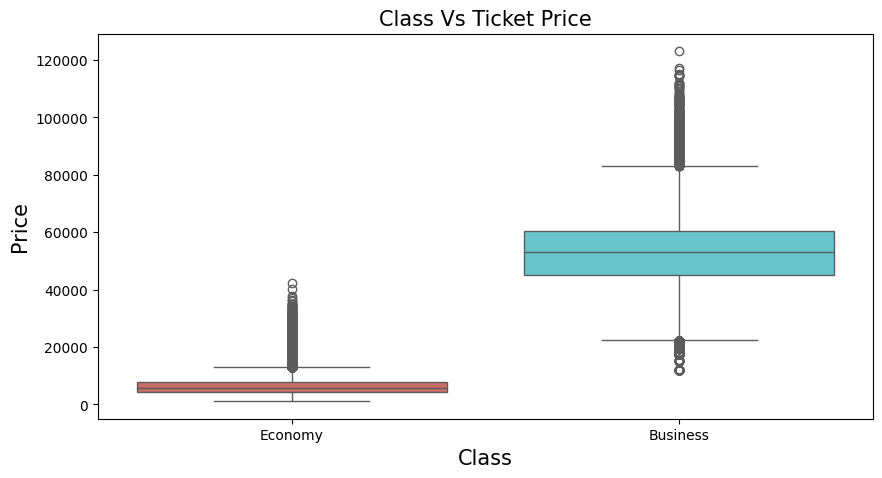

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

/tmp/ipython-input-1353968567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stops',y='price',data=df,palette='hls')


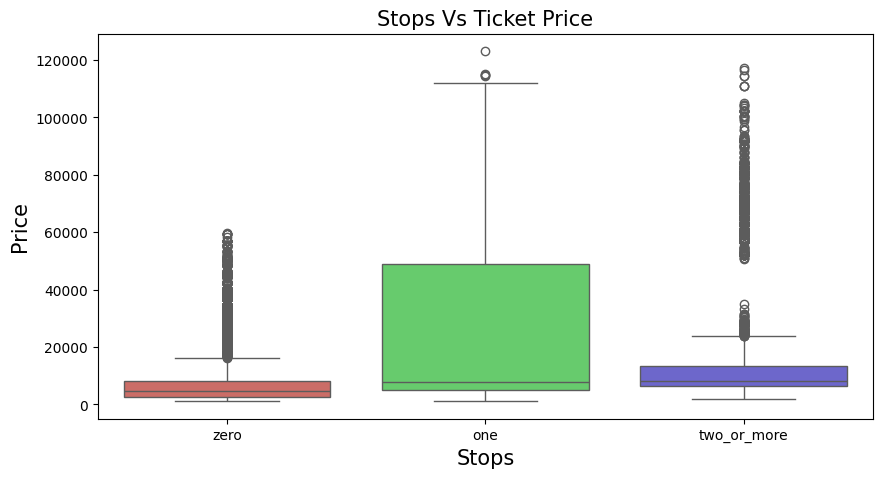

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

/tmp/ipython-input-3767571036.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')


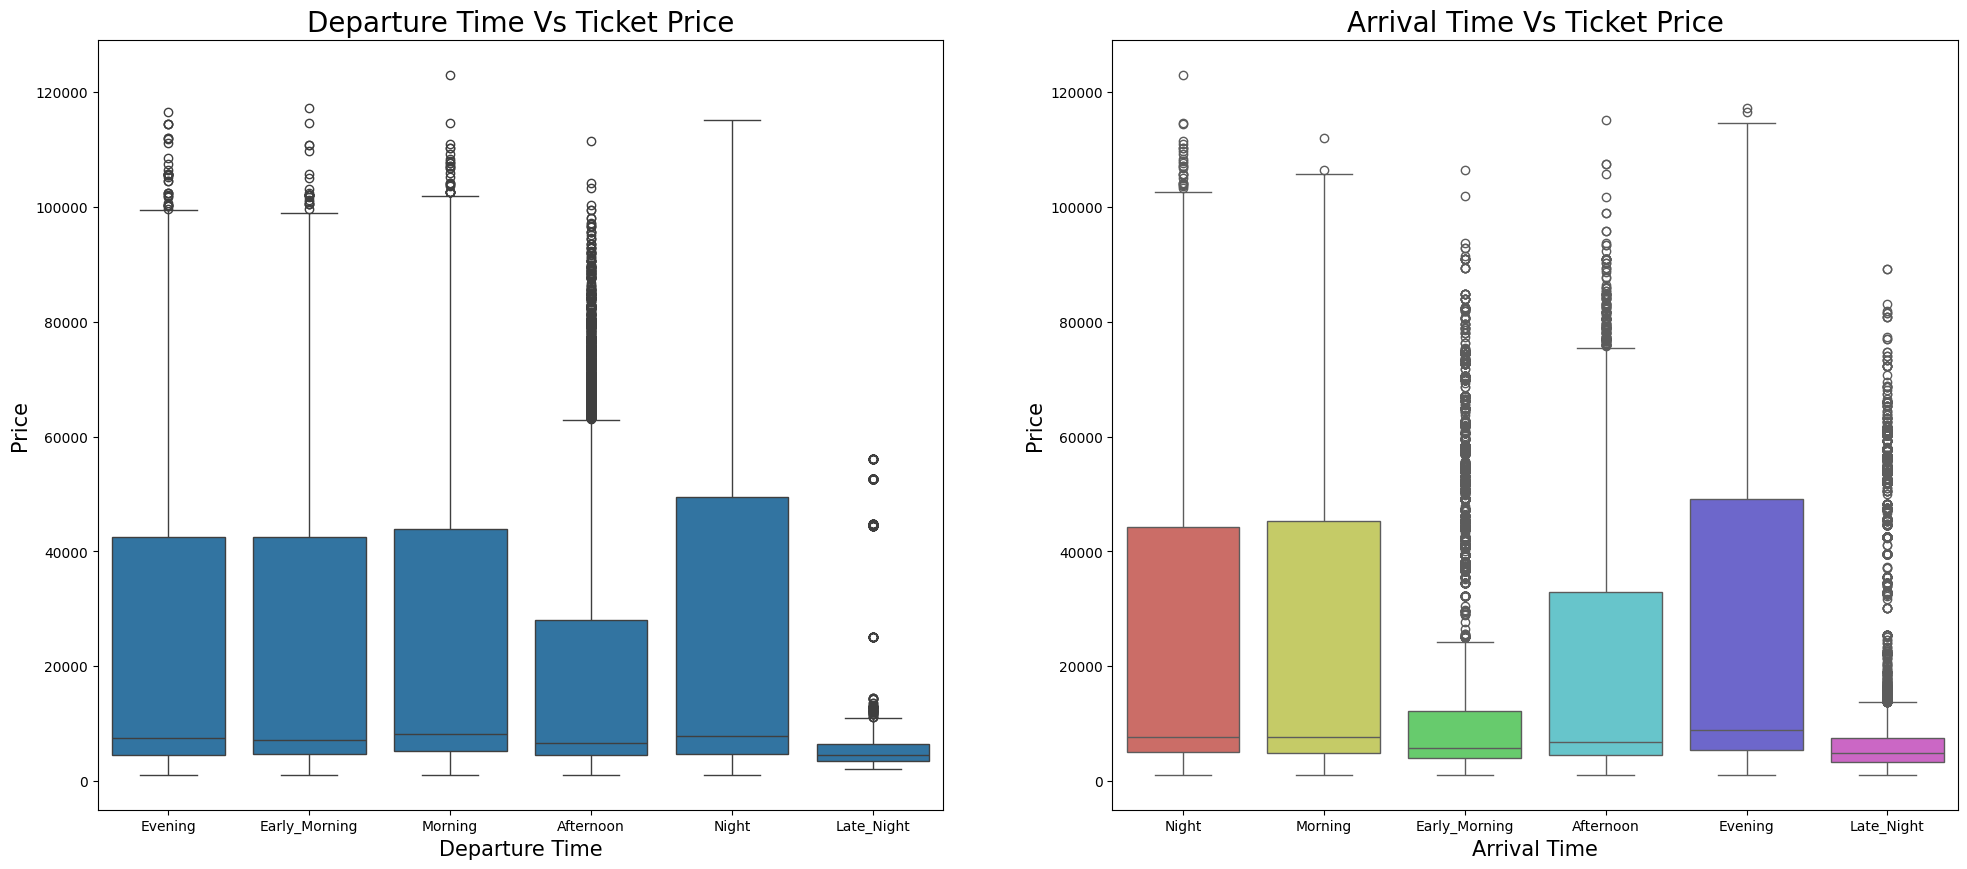

In [20]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

/tmp/ipython-input-3809536742.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='destination_city',y='price',data=df,palette='hls')


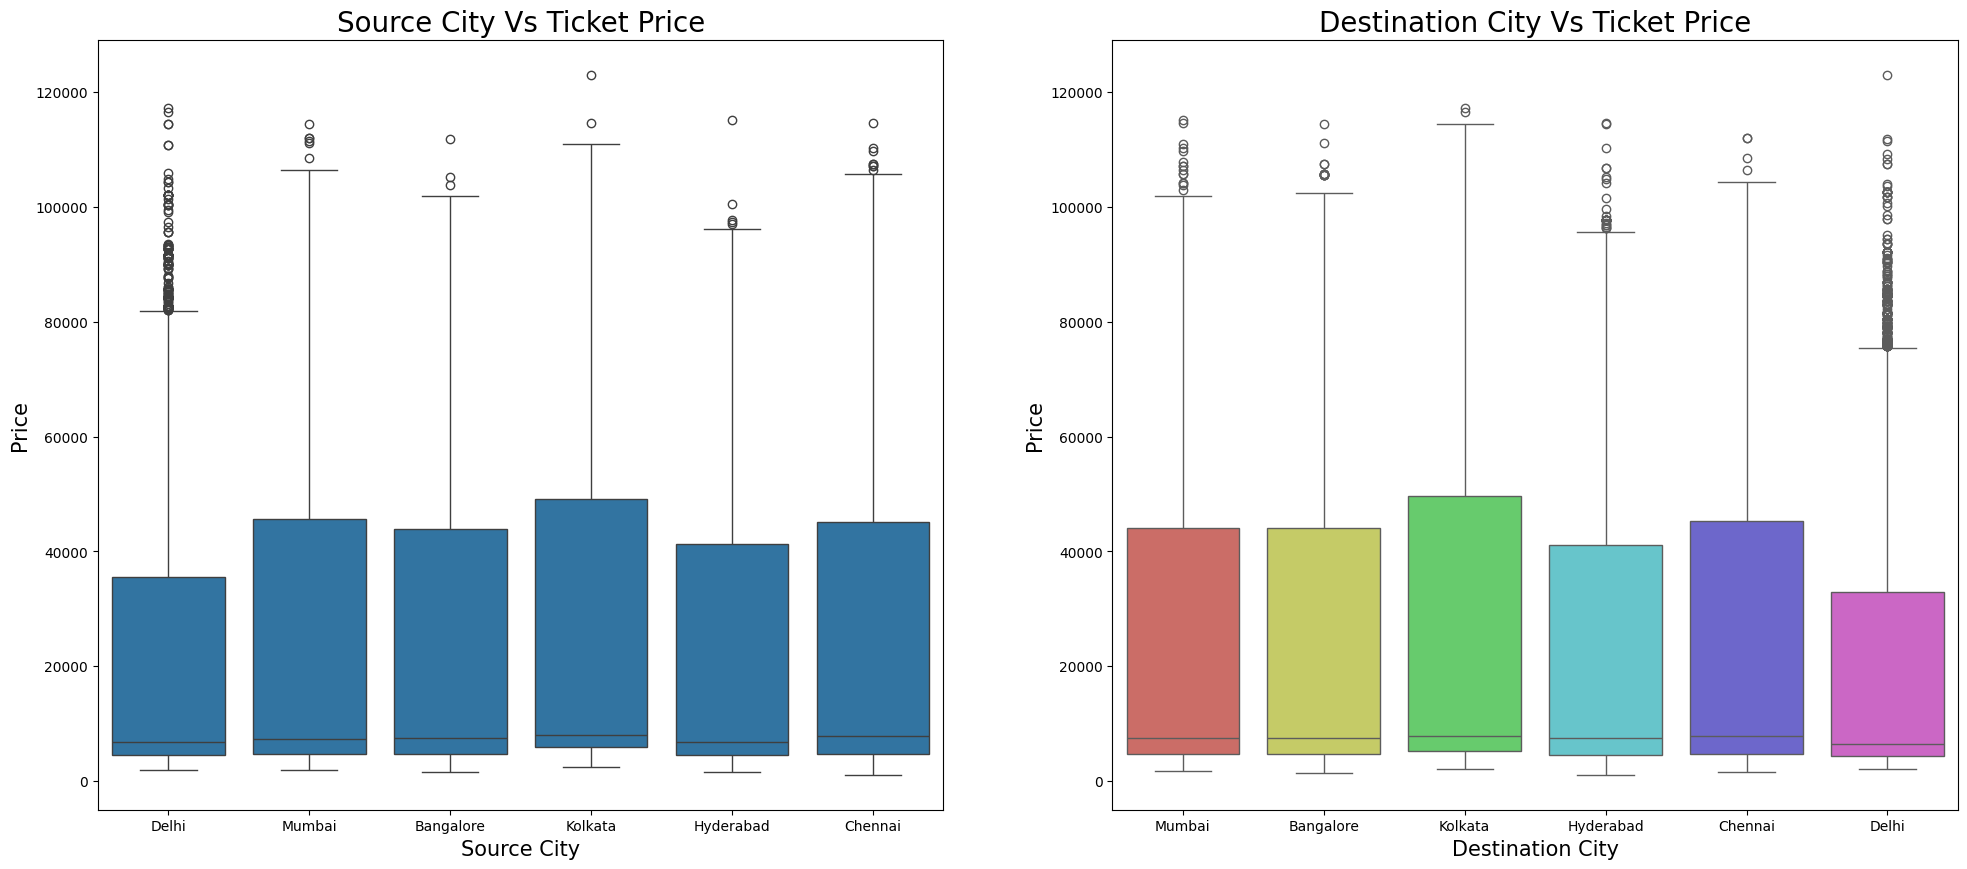

In [21]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

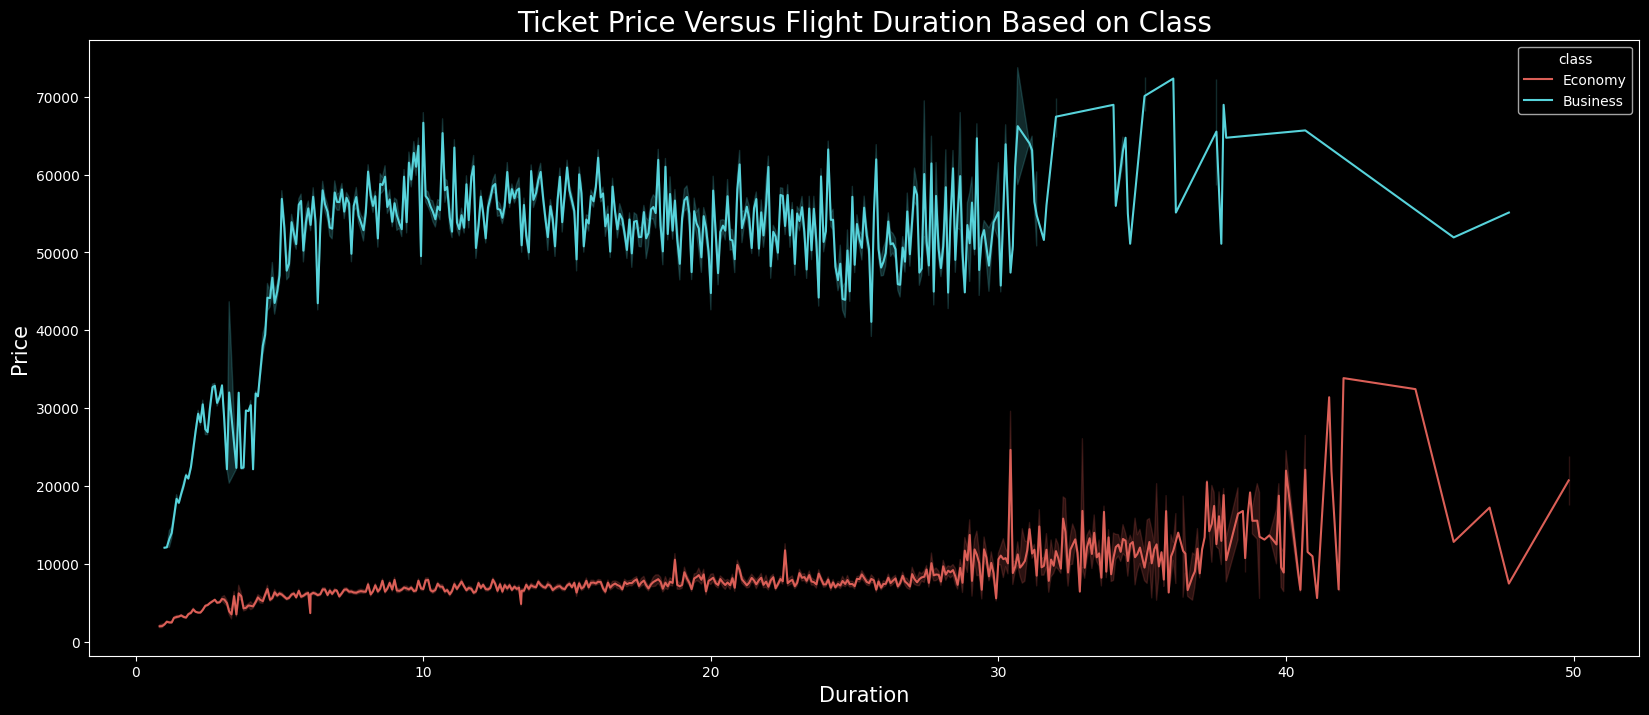

In [23]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

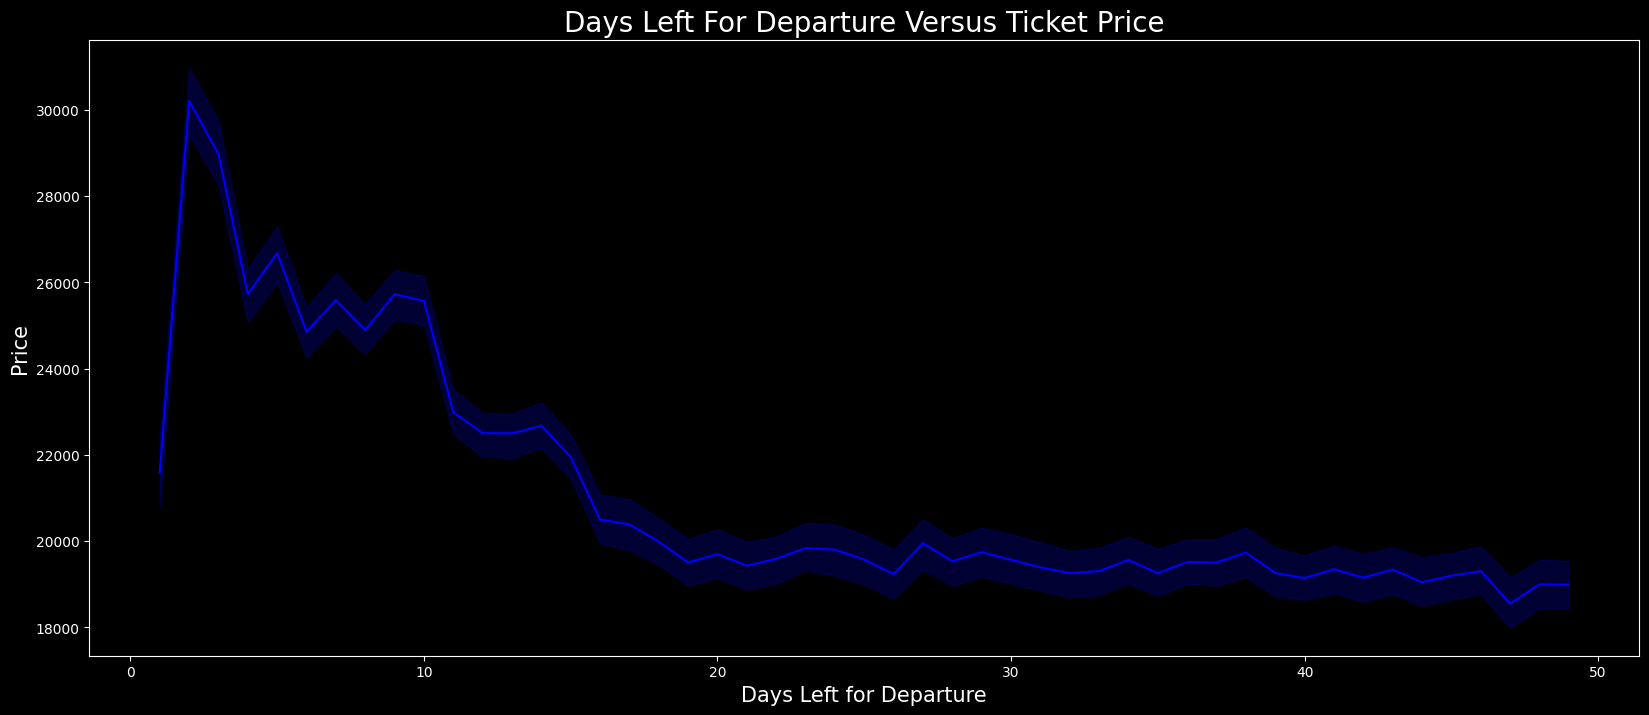

In [24]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

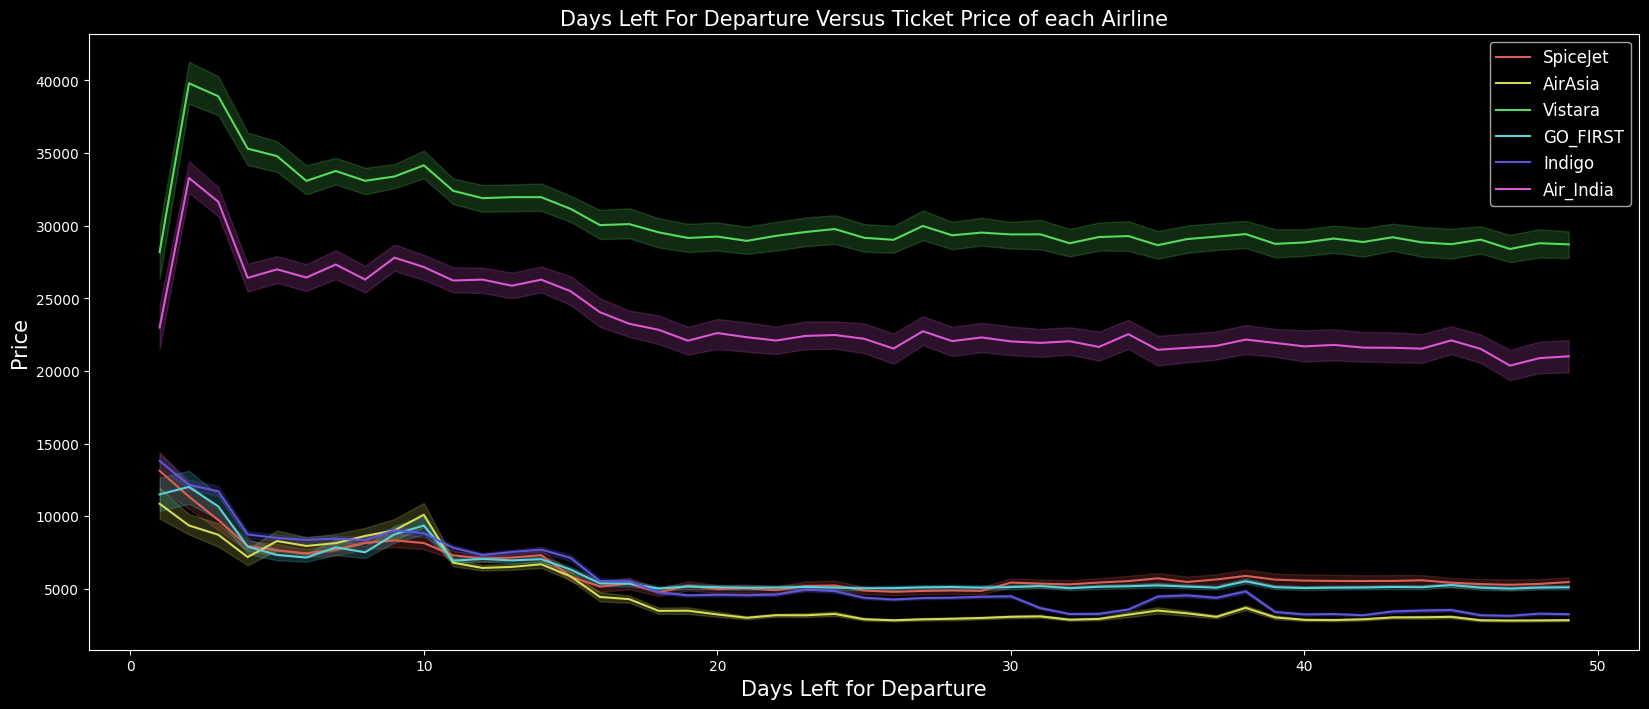

In [25]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [26]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [27]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [28]:
# Creating a Back up File
df_bk=df.copy()

# **Step 4 - Coverting the labels into a numeric form using Label Encoder**

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [30]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['price'],axis=1)
y=df['price']

# **Step 5 - Splitting the Data into Training set and Testing Set**

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [32]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [33]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


# **Step 6 - corrected + simplified evaluation loop (3 models)**

In [44]:
# corrected + simplified evaluation loop (3 models)
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# xgboost may not be installed on some runtimes; import inside try
try:
    import xgboost as xgb
    have_xgb = True
except Exception:
    have_xgb = False

from sklearn import metrics

# --- choose just 3 good models ---
models = [
    ("RandomForest", RandomForestRegressor(random_state=42, n_jobs=-1)),
    ("GradientBoosting", GradientBoostingRegressor(random_state=42)),
]

if have_xgb:
    models.append(("XGBoost", xgb.XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)))
else:
    print("Warning: xgboost not available — skipping XGBoost model.")

# helper metrics
def safe_rmsle_from_mse(mse):
    # RMSLE usually defined on predictions and true values; here we provide safe fallback
    if mse <= 0:
        return np.nan
    return np.log(np.sqrt(mse))

def MAPE(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    # avoid division by zero: if y_true==0, skip those entries
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# store results in a list of dicts (fast, pd.append replacement)
results_list = []

for name, model in models:
    # fit
    model.fit(x_train, y_train)

    # predict
    y_pred = model.predict(x_test)

    # basic errors
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    rmsle_safe = safe_rmsle_from_mse(mse)
    mape = MAPE(y_test, y_pred)

    # adjusted R2:
    n = len(y)                # total samples originally used for modeling (X,y)
    p = X.shape[1]            # number of features
    if n - p - 1 > 0:
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    else:
        adj_r2 = np.nan

    # print nicely
    print(f"Model: {name}")
    print(f" MAE: {mae:.3f} | MSE: {mse:.3f} | RMSE: {rmse:.3f}")
    print(f" R2: {r2:.4f} | Adj R2: {adj_r2 if not np.isnan(adj_r2) else 'NA'}")
    print(f" MAPE: {mape:.2f}% | RMSLE (safe): {rmsle_safe if not np.isnan(rmsle_safe) else 'NA'}")
    print("-" * 80)

    # collect
    results_list.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "Adj_R2": adj_r2,
        "MAPE": mape,
        "RMSLE_safe": rmsle_safe
    })

# convert to DataFrame and sort by MAE (best first)
Results = pd.DataFrame(results_list).sort_values("MAE").reset_index(drop=True)
Results


Model: RandomForest
 MAE: 1167.706 | MSE: 8145718.465 | RMSE: 2854.071
 R2: 0.9842 | Adj R2: 0.984172241686583
 MAPE: 7.93% | RMSLE (safe): 7.956501502748455
--------------------------------------------------------------------------------
Model: GradientBoosting
 MAE: 2808.071 | MSE: 22221139.557 | RMSE: 4713.930
 R2: 0.9568 | Adj R2: 0.9568226144999175
 MAPE: 20.67% | RMSLE (safe): 8.458277313019856
--------------------------------------------------------------------------------
Model: XGBoost
 MAE: 1862.407 | MSE: 11680762.000 | RMSE: 3417.713
 R2: 0.9773 | Adj R2: 0.9773033884119324
 MAPE: 14.23% | RMSLE (safe): 8.136726886481181
--------------------------------------------------------------------------------


,Model,MAE,MSE,RMSE,R2,Adj_R2,MAPE,RMSLE_safe
0,RandomForest,1167.706382,8.145718e+06,2854.070508,0.984173,0.984172,7.925757,7.956502
1,XGBoost,1862.407227,1.168076e+07,3417.712978,0.977304,0.977303,14.232981,8.136727
2,GradientBoosting,2808.070549,2.222114e+07,4713.930372,0.956824,0.956823,20.673023,8.458277


In [45]:
Results


,Model,MAE,MSE,RMSE,R2,Adj_R2,MAPE,RMSLE_safe
0,RandomForest,1167.706382,8.145718e+06,2854.070508,0.984173,0.984172,7.925757,7.956502
1,XGBoost,1862.407227,1.168076e+07,3417.712978,0.977304,0.977303,14.232981,8.136727
2,GradientBoosting,2808.070549,2.222114e+07,4713.930372,0.956824,0.956823,20.673023,8.458277


In [50]:
models=['GradientBoostingRegressor','RandomForestRegressor','XGBRegressor']
result=pd.DataFrame({'Model_Name':models})

# Get the values from the Results dataframe (not dictionary)
result['Adj_R2'] = Results['Adj_R2'].values
result['Mean_Absolute_Error_MAE'] = Results['MAE'].values
result['Root_Mean_Squared_Error_RMSE'] = Results['RMSE'].values
result['Mean_Absolute_Percentage_Error_MAPE'] = Results['MAPE'].values
result['Mean_Squared_Error_MSE'] = Results['MSE'].values
result['Root_Mean_Squared_Log_Error_RMSLE'] = Results['RMSLE_safe'].values
result['R2_score'] = Results['R2'].values

result = result.sort_values(by='Adj_R2', ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R2,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,GradientBoostingRegressor,0.984172,1167.706382,2854.070508,7.925757,8.145718e+06,7.956502,0.984173
1,RandomForestRegressor,0.977303,1862.407227,3417.712978,14.232981,1.168076e+07,8.136727,0.977304
2,XGBRegressor,0.956823,2808.070549,4713.930372,20.673023,2.222114e+07,8.458277,0.956824


In [51]:
#Trainig the model with
modelETR.fit(x_train, y_train)

# Predict the model with test data

y_pred = modelETR.predict(x_test)

In [52]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [53]:
result.sample(10)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
94879,Vistara,UK-893,Bangalore,Evening,one,Morning,Mumbai,Economy,14.08,7,8277,8277,8311.73
98729,AirAsia,I5-1782,Bangalore,Night,one,Early_Morning,Mumbai,Economy,10.92,28,2203,2203,2952.04
266785,Vistara,UK-706,Kolkata,Morning,one,Night,Mumbai,Business,13.58,41,62591,62591,63019.67
298629,Vistara,UK-822,Chennai,Morning,one,Night,Hyderabad,Business,11.17,17,41064,41064,41841.51
286806,Vistara,UK-878,Hyderabad,Afternoon,one,Morning,Chennai,Business,22.92,33,41314,41314,41834.97
30713,Air_India,AI-502,Delhi,Afternoon,one,Night,Hyderabad,Economy,6.75,17,6790,6790,6795.61
66052,Indigo,6E-6088,Mumbai,Night,zero,Night,Kolkata,Economy,2.42,27,4499,4499,4494.00
234401,Vistara,UK-996,Mumbai,Evening,one,Morning,Kolkata,Business,14.08,5,64285,64285,70866.34
75659,Vistara,UK-994,Mumbai,Morning,one,Night,Hyderabad,Economy,12.50,38,5014,5014,4595.16
155324,Air_India,AI-515,Hyderabad,Morning,one,Night,Delhi,Economy,14.33,25,6117,6117,5313.02


# **Final Visualizations**

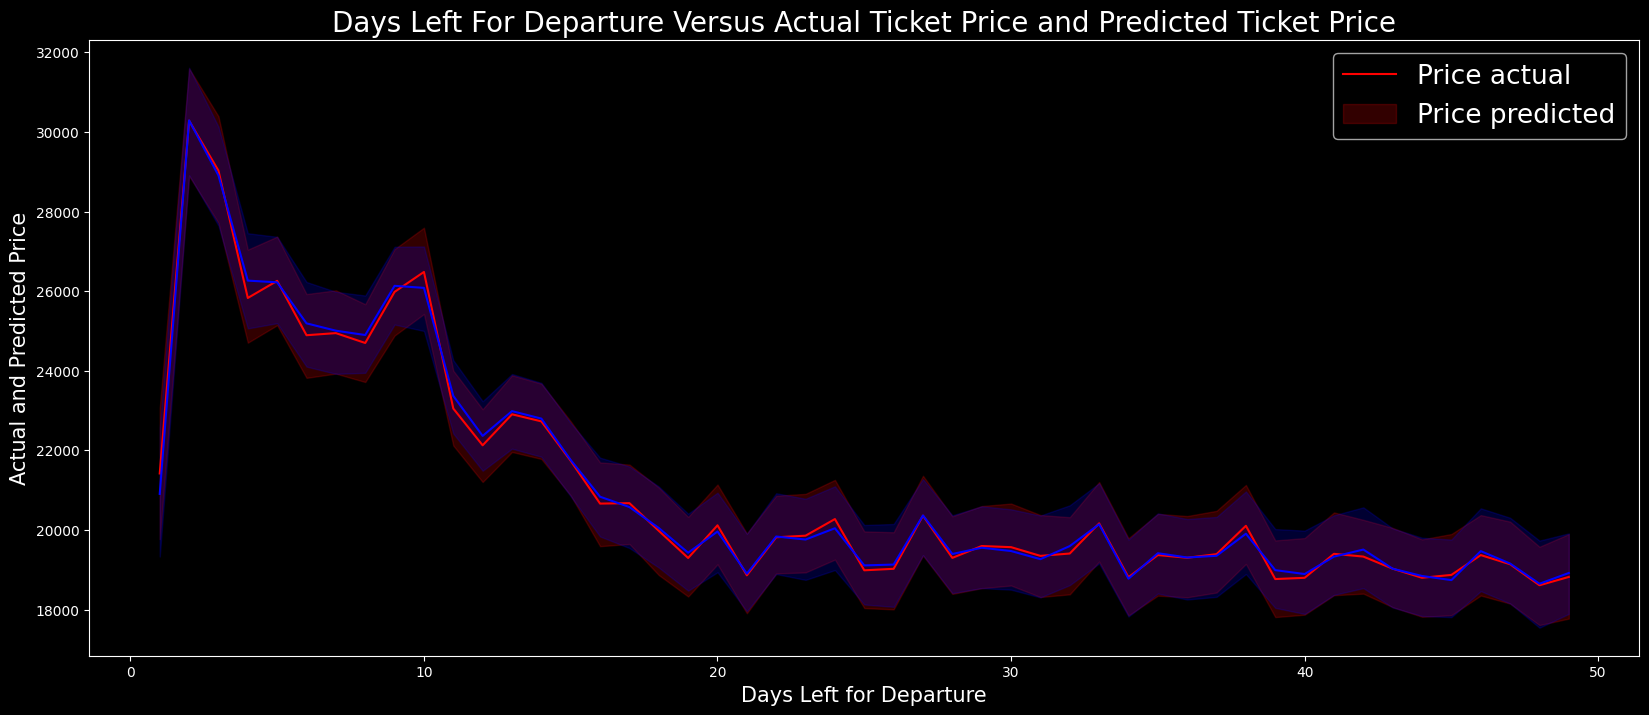

In [54]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

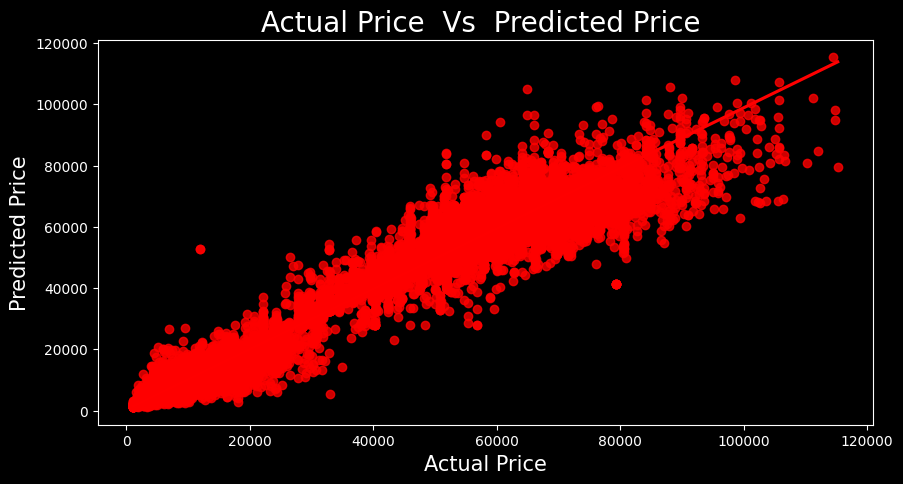

In [56]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='red')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()